In [2]:
# Importar bibliotecas
import pandas as pd
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import emoji
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
path = r'./base_original/nothemetweets.csv'

df_tabela_emocoes = pd.read_csv(path, sep=',')
display(df_tabela_emocoes.head(n=10))
print('Table has {:,} rows and {} columns'.format(df_tabela_emocoes.shape[0], df_tabela_emocoes.shape[1]))

,id,text,date
0,1.031761e+18,NaN,Tue Aug 21 04:32:55 +0000 2018
1,NaN,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018
2,1.031761e+18,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018
3,1.031761e+18,"@Primo_Resmungao Pq da pr jeito!!é uma oferta,...",Tue Aug 21 04:32:21 +0000 2018
4,1.031761e+18,"@BadWolf_Wagner @DanieVedo Eu entendi, mas iss...",Tue Aug 21 04:32:03 +0000 2018
5,1.031761e+18,@Chyko661 @g1 [+] Carcinoma Hepatico (Cancer d...,Tue Aug 21 04:31:53 +0000 2018
6,1.031761e+18,"Aquela mina da limpeza, que tinha um marido co...",Tue Aug 21 04:31:46 +0000 2018
7,1.031761e+18,"@narryfools aqui, espero que você melhore logo...",Tue Aug 21 04:31:32 +0000 2018
8,1.031761e+18,@fefocaires se és feliz trabalhando nisso entã...,Tue Aug 21 04:31:24 +0000 2018
9,1.031761e+18,vamos se seguir no insta? se quiser sdv :) #Te...,Tue Aug 21 04:31:19 +0000 2018


Table has 699,039 rows and 3 columns


In [78]:
df_tabela_emocoes = df_tabela_emocoes.drop(df_tabela_emocoes.columns[[-2, -1]], axis=1)

In [79]:
df_tabela_emocoes.to_csv('nothemetweets.csv', index=False)

In [9]:
df_tabela_emocoes = df_tabela_emocoes.rename({'text': 'texto'}, axis='columns')

In [5]:
## Checa por valores ausentes
df_tabela_emocoes.isna().any()

id      True
text    True
date    True
dtype: bool

In [10]:
# Elimina valores ausentes
tweet_df = df_tabela_emocoes.dropna(how='any')

In [11]:
positive_symbols = [ ":)", ": )", ":D", "xD", ":-)"]
negative_symbols = [ ":/", ":(", ":-(", ":´)", ":´´)", ":´("]
neutral_symbols = [ ':V', ':P', ':/']

symbols = [ ":)", ": )", ":D", "xD", ":-)", ':V', ':P', ':/', 
                        ":/", ":(", ":-(", ":´)", ":´´)", ":´("]

def symbol_matcher(text):
        splited_text = text.split()
        symbol_backwards = splited_text[-1::-1]
        for item in symbol_backwards:
            if item in symbols:
                return item
def felling_matcher(item):
        if item in positive_symbols:
                return "Positivo"
        elif item in neutral_symbols:
                return "Neutro"
        elif item in negative_symbols:
                return "Negativo"
                
tweet_df['simbolo'] = tweet_df['texto'].apply(symbol_matcher)
tweet_df['sentimento'] = tweet_df['simbolo'].apply(felling_matcher)

print("\nDF com sentimentos positivos: ".upper())
display(tweet_df.query('sentimento == "Positivo"'))
print("DF com sentimentos neutros: ".upper())
display(tweet_df.query('sentimento == "Neutro"'))
print("DF com sentimentos negativos: ".upper())
display(tweet_df.query('sentimento == "Negativo"'))


DF COM SENTIMENTOS POSITIVOS: 


C:\Users\pablo\AppData\Local\Temp\ipykernel_8640\4049618686.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['simbolo'] = tweet_df['texto'].apply(symbol_matcher)
C:\Users\pablo\AppData\Local\Temp\ipykernel_8640\4049618686.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['sentimento'] = tweet_df['simbolo'].apply(felling_matcher)


,id,texto,date,simbolo,sentimento
2,1.031761e+18,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,:D,Positivo
5,1.031761e+18,@Chyko661 @g1 [+] Carcinoma Hepatico (Cancer d...,Tue Aug 21 04:31:53 +0000 2018,:),Positivo
6,1.031761e+18,"Aquela mina da limpeza, que tinha um marido co...",Tue Aug 21 04:31:46 +0000 2018,:),Positivo
7,1.031761e+18,"@narryfools aqui, espero que você melhore logo...",Tue Aug 21 04:31:32 +0000 2018,:),Positivo
8,1.031761e+18,@fefocaires se és feliz trabalhando nisso entã...,Tue Aug 21 04:31:24 +0000 2018,:),Positivo
...,...,...,...,...,...
699034,1.050705e+18,Acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,:),Positivo
699035,1.050707e+18,"@mayckcunha Olá, Mayck. Você já é cliente Clar...",Fri Oct 12 11:16:02 +0000 2018,:),Positivo
699036,1.050706e+18,Opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,:),Positivo
699037,1.050705e+18,@andrebraga2806 Foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,:),Positivo


DF COM SENTIMENTOS NEUTROS: 


,id,texto,date,simbolo,sentimento
3,1.031761e+18,"@Primo_Resmungao Pq da pr jeito!!é uma oferta,...",Tue Aug 21 04:32:21 +0000 2018,:P,Neutro
4,1.031761e+18,"@BadWolf_Wagner @DanieVedo Eu entendi, mas iss...",Tue Aug 21 04:32:03 +0000 2018,:P,Neutro
12,1.031760e+18,Quando você joga com um youtuber que você segu...,Tue Aug 21 04:30:44 +0000 2018,:P,Neutro
46,1.031762e+18,@Primo_Resmungao @God_is_a_she A tua mulher pa...,Tue Aug 21 04:35:19 +0000 2018,:P,Neutro
60,1.031758e+18,@padilhafbpa Consegue baixar Discord no seu ce...,Tue Aug 21 04:22:13 +0000 2018,:P,Neutro
...,...,...,...,...,...
698819,1.050715e+18,@ritamendes015 Atrás do perfil da rita não val...,Fri Oct 12 11:50:34 +0000 2018,:P,Neutro
698893,1.050719e+18,"No momento morrendo de sono, mas já já a gente...",Fri Oct 12 12:05:59 +0000 2018,:P,Neutro
698897,1.050718e+18,"Para nós, o programa de sexta-feira é claro. C...",Fri Oct 12 12:00:57 +0000 2018,:P,Neutro
698942,1.050717e+18,@andrebento @RebeloNuno @iAModp @jotadaega Ehe...,Fri Oct 12 11:58:57 +0000 2018,:P,Neutro


DF COM SENTIMENTOS NEGATIVOS: 


,id,texto,date,simbolo,sentimento
162,1.031746e+18,Pra sempre bonde do bodão em nossos corações! ...,Tue Aug 21 03:31:56 +0000 2018,:´),Negativo
194,1.031749e+18,façam chamada cmg :) :(,Tue Aug 21 03:44:42 +0000 2018,:(,Negativo
245,1.031747e+18,"@oioijuliana aaaa é só chamar, real hahah :) m...",Tue Aug 21 03:35:25 +0000 2018,:(,Negativo
918,1.031730e+18,"Bebê, vc prefere sunshine ou bela mia?? Boa no...",Tue Aug 21 02:29:32 +0000 2018,:(,Negativo
938,1.031734e+18,achei um filme legal :) to com sono :(,Tue Aug 21 02:45:55 +0000 2018,:(,Negativo
...,...,...,...,...,...
697125,1.049138e+18,Do nada cara :(,Mon Oct 08 03:23:29 +0000 2018,:(,Negativo
697353,1.050762e+18,"@nwtsz é bom mesmo Nats, mas o meu ja ta no fi...",Fri Oct 12 14:56:18 +0000 2018,:´),Negativo
697864,1.050743e+18,vou ter churrasco :) é com gente da igreja que...,Fri Oct 12 13:40:38 +0000 2018,:(,Negativo
698167,1.050727e+18,Vejo aqueles memes: quando vc recebe visita :(...,Fri Oct 12 12:37:48 +0000 2018,:(,Negativo


In [12]:
# Elimina valores ausentes
tweet_df = tweet_df.dropna(how='any')

In [34]:
## Checa por valores ausentes
tweet_df.isna().any()

id            False
texto         False
date          False
simbolo       False
sentimento    False
dtype: bool

In [13]:
tweet_df.to_csv(r"./base_transformada/tweets_transformed.csv", index=False)

In [14]:
df = tweet_df 

In [22]:
df = df.reset_index(drop=True)

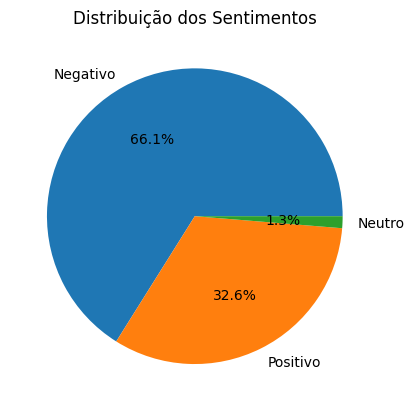

In [15]:
# Distribuição dos sentimentos
# Contagem de tweets por sentimento
sentimento_counts = df["sentimento"].value_counts()

# Proporção de tweets por sentimento
sentimento_proportions = sentimento_counts / df.shape[0]

# Plotar a distribuição dos sentimentos
plt.pie(sentimento_proportions, labels=sentimento_counts.index, autopct='%1.1f%%')
plt.title("Distribuição dos Sentimentos")
plt.show()

In [41]:
emojis_positivos = {}
emojis_negativos = {}
simbolos_positivos = {} 
simbolos_negativos = {}
simbolos_neutros = {}

positive_symbols = [ ":)", ": )", ":D", "xD", ":-)"]
negative_symbols = [ ":/", ":(", ":-(", ":´)", ":´´)", ":´("]
neutral_symbols = [ ':V', ':P', ':/']

for i in range(df.shape[0]):
    tweet = df.loc[i, "texto"] 
    simbolo = df.loc[i:i + 1, 'simbolo']
    sentimento = df.loc[i, "sentimento"]

    # Analisa emojis e elemntos específicos relacionados
    for char in tweet:
        if char in emoji.EMOJI_DATA: # Para bibliotecas de emoji
            if sentimento == "Positivo":
                emojis_positivos[char] = emojis_positivos.get(char, 0) + 1
            elif sentimento == "Negativo":
                emojis_negativos[char] = emojis_negativos.get(char, 0) + 1
    
    for char in simbolo:
        if sentimento == "Positivo":
            # Exemplo: Adiciona simbolos associados a positividade (e.g., ":)", "*o*")
            if char in positive_symbols:
                simbolos_positivos[char] = simbolos_positivos.get(char, 0) + 1
        elif sentimento == "Negativo":
            # Exemplo: Adiciona simbolos associados a negatividade
            if char in negative_symbols:
                simbolos_negativos[char] = simbolos_negativos.get(char, 0) + 1
        elif sentimento == "Neutro":
            # Exemplo: Adiciona simbolos associados a neutralidade
            if char in neutral_symbols:
                simbolos_neutros[char] = simbolos_neutros.get(char, 0) + 1

print("\nEmojis positivos mais frequentes:")
print(sorted(emojis_positivos.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nEmojis negativos mais frequentes:")
print(sorted(emojis_negativos.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nSímbolos positivos mais frequentes:")
print(sorted(simbolos_positivos.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nSímbolos negativos mais frequentes:")
print(sorted(simbolos_negativos.items(), key=lambda x: x[1], reverse=True)[:10])

print("\nSímbolos neutros mais frequentes:")
print(sorted(simbolos_neutros.items(), key=lambda x: x[1], reverse=True)[:10])



Emojis positivos mais frequentes:
[('❤', 1537), ('😂', 564), ('😍', 433), ('💜', 391), ('♥', 353), ('💕', 337), ('💛', 285), ('💗', 255), ('💖', 241), ('💞', 185)]

Emojis negativos mais frequentes:
[('❤', 2866), ('😢', 2138), ('💕', 1206), ('😭', 1081), ('💗', 982), ('💖', 932), ('💜', 790), ('💞', 652), ('♥', 623), ('😔', 489)]

Símbolos positivos mais frequentes:
[(':)', 300911), (':D', 49284), (':-)', 10587), ('xD', 193)]

Símbolos negativos mais frequentes:
[(':(', 735656), (':-(', 10022), (':/', 370), (':´(', 246), (':´)', 122)]

Símbolos neutros mais frequentes:
[(':P', 7144), (':/', 491), (':V', 5)]


In [42]:
df.isna().any()

id            False
texto         False
date          False
simbolo       False
sentimento    False
dtype: bool

In [65]:
analyzer = SentimentIntensityAnalyzer()

df["sentimento_predito"] = df["texto"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# Parãmetros base para comparação
sentiment_thresholds = {"Negativo": -0.2, "Neutro": 0, "Positivo": 0.2}

# Cria uma nova coluna dos sentimentos de acordo com a categoria estipulada
def predict_sentiment_category(score):
        if  0 < score <= -0.2:
            return "Negativo"
        elif score == 0:
             return "Neutro" 
        elif score > 0.2:
             return "Positivo"
        else:
            return "Indeterminado"
        
df["sentimento_predito_category"] = df["sentimento_predito"].apply(predict_sentiment_category)

report = classification_report(df["sentimento"], df["sentimento_predito_category"])
print(report)


In [61]:
df["sentimento_predito"]

0         0.6514
1         0.6924
2         0.4084
3        -0.3400
4         0.2023
           ...  
566143    0.4588
566144    0.2869
566145    0.4588
566146    0.4588
566147    0.5550
Name: sentimento_predito, Length: 566148, dtype: float64

In [63]:
df["sentimento_predito_category"].nunique()

3

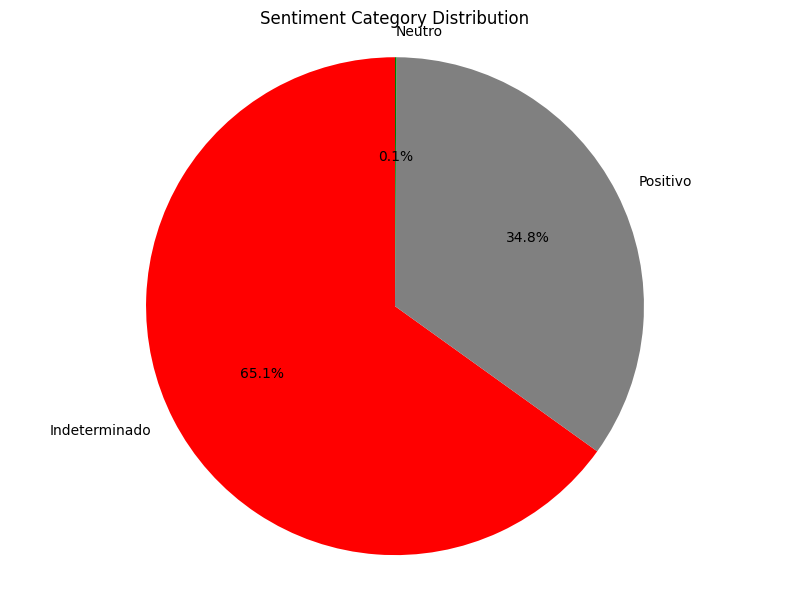

In [64]:
# Ensure "sentimento_predito_category" column exists
if "sentimento_predito_category" not in df.columns:
    print("Error: 'sentimento_predito_category' column not found.")
else:
    # Count occurrences of each sentiment category
    sentiment_counts = df["sentimento_predito_category"].value_counts().sort_values(ascending=False)

    # Prepare labels and colors for the plot (adjust colors as needed)
    category_labels = sentiment_counts.index.to_numpy()
    category_colors = ['red', 'gray', 'green']  # Adjust colors for Negativo, Neutro, Positivo

    # Create the pie chart
    plt.figure(figsize=(8, 6))  # Adjust figure size as desired
    plt.pie(sentiment_counts, labels=category_labels, autopct="%1.1f%%", startangle=90, colors=category_colors)
    plt.title("Sentiment Category Distribution")
    plt.axis('equal')  # Equal aspect ratio for a circular pie chart
    plt.tight_layout()
    plt.show()